In [15]:
#Importamos los archivos necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
#Permitimos mostrar full tables
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
bajada = pd.read_csv('Premier.csv', sep = ';', encoding='latin-1' )


In [4]:
df = bajada.copy()
df.head()

,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,PassLive,PassDead,Drib,Sh,Fld,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,OG,Matches
0,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,28,1990,26.9,60,2.23,31,23,2,2,2,5,0.19,3,1,1,0,0,0,Matches
1,Max Aarons\Max-Aarons,eng ENG,DF,Norwich City,19,2000,34.0,53,1.56,41,2,3,3,4,3,0.09,1,1,0,0,1,0,Matches
2,Tammy Abraham\Tammy-Abraham,eng ENG,FW,Chelsea,21,1997,24.1,47,1.95,33,0,6,6,2,10,0.41,4,0,3,2,1,0,Matches
3,Che Adams\Che-Adams,eng ENG,FW,Southampton,23,1996,10.6,19,1.79,12,0,2,2,3,4,0.38,2,0,0,0,2,0,Matches
4,Adrián\Adrian,es ESP,GK,Liverpool,32,1987,9.7,2,0.21,2,0,0,0,0,0,0.00,0,0,0,0,0,0,Matches


In [5]:
#Realizamos transformaciones al dataset para que queden como los del tutorial
df = df.drop(['GCA', 'GCA90', 'PassLive.1', 'PassDead.1', 'Drib.1', 'Sh.1', 'Fld.1', 'OG', 'Matches'], axis = 1)
df = df.rename(index=str, columns={'PassLive' : 'PASS_SCA', 
                                   'PassDead' : 'DEADBALL_SCA', 
                                    'Drib': 'DRIBBLE_SCA', 
                                   'Sh':'SHOOT_SCA', 
                                   'Fld':'FOULED_SCA'} 
              )
df.head()

,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,PASS_SCA,DEADBALL_SCA,DRIBBLE_SCA,SHOOT_SCA,FOULED_SCA
0,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,28,1990,26.9,60,2.23,31,23,2,2,2
1,Max Aarons\Max-Aarons,eng ENG,DF,Norwich City,19,2000,34.0,53,1.56,41,2,3,3,4
2,Tammy Abraham\Tammy-Abraham,eng ENG,FW,Chelsea,21,1997,24.1,47,1.95,33,0,6,6,2
3,Che Adams\Che-Adams,eng ENG,FW,Southampton,23,1996,10.6,19,1.79,12,0,2,2,3
4,Adrián\Adrian,es ESP,GK,Liverpool,32,1987,9.7,2,0.21,2,0,0,0,0


In [6]:
#Comenzamos a limpiar un poco el dataset
df['Player'] = df['Player'].str.split('\\', expand = True)[0]
df['Nation'] = df['Nation'].str.split(' ', expand = True)[1]
df['Pos'] = df['Pos'].str[:2]
df.head()

,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,PASS_SCA,DEADBALL_SCA,DRIBBLE_SCA,SHOOT_SCA,FOULED_SCA
0,Patrick van Aanholt,NED,DF,Crystal Palace,28,1990,26.9,60,2.23,31,23,2,2,2
1,Max Aarons,ENG,DF,Norwich City,19,2000,34.0,53,1.56,41,2,3,3,4
2,Tammy Abraham,ENG,FW,Chelsea,21,1997,24.1,47,1.95,33,0,6,6,2
3,Che Adams,ENG,FW,Southampton,23,1996,10.6,19,1.79,12,0,2,2,3
4,Adrián,ESP,GK,Liverpool,32,1987,9.7,2,0.21,2,0,0,0,0


In [7]:

sum_list = [ 'PASS_SCA',  'DEADBALL_SCA', 'DRIBBLE_SCA','SHOOT_SCA', 'FOULED_SCA']
df['Sum_SCA'] = df[sum_list].sum(axis = 1)
#df['Pass_SCA_Ratio'] = df['PASS_SCA']/df['Sum_SCA']
df.head()

,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,PASS_SCA,DEADBALL_SCA,DRIBBLE_SCA,SHOOT_SCA,FOULED_SCA,Sum_SCA
0,Patrick van Aanholt,NED,DF,Crystal Palace,28,1990,26.9,60,2.23,31,23,2,2,2,60
1,Max Aarons,ENG,DF,Norwich City,19,2000,34.0,53,1.56,41,2,3,3,4,53
2,Tammy Abraham,ENG,FW,Chelsea,21,1997,24.1,47,1.95,33,0,6,6,2,47
3,Che Adams,ENG,FW,Southampton,23,1996,10.6,19,1.79,12,0,2,2,3,19
4,Adrián,ESP,GK,Liverpool,32,1987,9.7,2,0.21,2,0,0,0,0,2


In [8]:
#Creamos las nuevas columnas calculando la columna como hicimos antes
nuevas_columnas = [each + '_Ratio' for each in sum_list]
for idx, val in enumerate(nuevas_columnas):
    df[val] = df[sum_list[idx]]/df['Sum_SCA']

df['Suma_De_ratios'] = df[nuevas_columnas].sum(axis = 1)
df.head()

,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,PASS_SCA,DEADBALL_SCA,DRIBBLE_SCA,SHOOT_SCA,FOULED_SCA,Sum_SCA,PASS_SCA_Ratio,DEADBALL_SCA_Ratio,DRIBBLE_SCA_Ratio,SHOOT_SCA_Ratio,FOULED_SCA_Ratio,Suma_De_ratios
0,Patrick van Aanholt,NED,DF,Crystal Palace,28,1990,26.9,60,2.23,31,23,2,2,2,60,0.516667,0.383333,0.033333,0.033333,0.033333,1.0
1,Max Aarons,ENG,DF,Norwich City,19,2000,34.0,53,1.56,41,2,3,3,4,53,0.773585,0.037736,0.056604,0.056604,0.075472,1.0
2,Tammy Abraham,ENG,FW,Chelsea,21,1997,24.1,47,1.95,33,0,6,6,2,47,0.702128,0.000000,0.127660,0.127660,0.042553,1.0
3,Che Adams,ENG,FW,Southampton,23,1996,10.6,19,1.79,12,0,2,2,3,19,0.631579,0.000000,0.105263,0.105263,0.157895,1.0
4,Adrián,ESP,GK,Liverpool,32,1987,9.7,2,0.21,2,0,0,0,0,2,1.000000,0.000000,0.000000,0.000000,0.000000,1.0


In [9]:
#Nos quedamos solo con mediocampistas o delanteros / con jugadores que hayan jugado 5 veces 90 minutos y que tengan al menos 15 tiros al arco
df_atk = df[((df['Pos'] == 'FW')| (df['Pos'] == 'MF')) & (df['90s'] > 5) & (df['SCA'] > 15) ]
df_atk.head()

,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,PASS_SCA,DEADBALL_SCA,DRIBBLE_SCA,SHOOT_SCA,FOULED_SCA,Sum_SCA,PASS_SCA_Ratio,DEADBALL_SCA_Ratio,DRIBBLE_SCA_Ratio,SHOOT_SCA_Ratio,FOULED_SCA_Ratio,Suma_De_ratios
2,Tammy Abraham,ENG,FW,Chelsea,21,1997,24.1,47,1.95,33,0,6,6,2,47,0.702128,0.000000,0.127660,0.127660,0.042553,1.0
3,Che Adams,ENG,FW,Southampton,23,1996,10.6,19,1.79,12,0,2,2,3,19,0.631579,0.000000,0.105263,0.105263,0.157895,1.0
5,Sergio Agüero,ARG,FW,Manchester City,31,1988,16.1,51,3.16,28,0,9,9,5,51,0.549020,0.000000,0.176471,0.176471,0.098039,1.0
8,Marc Albrighton,ENG,MF,Leicester City,29,1989,8.8,26,2.94,22,2,1,1,0,26,0.846154,0.076923,0.038462,0.038462,0.000000,1.0
12,Dele Alli,ENG,MF,Tottenham,23,1996,20.4,53,2.60,39,1,9,2,2,53,0.735849,0.018868,0.169811,0.037736,0.037736,1.0


In [39]:
#Arrancamos con K-Means

km = KMeans(n_clusters = 4, init = 'random', random_state = 0)
y_km = km.fit_predict(df_atk[nuevas_columnas])
df_atk['Cluster'] = y_km
df_atk.head()

C:\Users\dicarlom\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,PASS_SCA,DEADBALL_SCA,DRIBBLE_SCA,SHOOT_SCA,FOULED_SCA,Sum_SCA,PASS_SCA_Ratio,DEADBALL_SCA_Ratio,DRIBBLE_SCA_Ratio,SHOOT_SCA_Ratio,FOULED_SCA_Ratio,Suma_De_ratios,Cluster
2,Tammy Abraham,ENG,FW,Chelsea,21,1997,24.1,47,1.95,33,0,6,6,2,47,0.702128,0.000000,0.127660,0.127660,0.042553,1.0,2
3,Che Adams,ENG,FW,Southampton,23,1996,10.6,19,1.79,12,0,2,2,3,19,0.631579,0.000000,0.105263,0.105263,0.157895,1.0,1
5,Sergio Agüero,ARG,FW,Manchester City,31,1988,16.1,51,3.16,28,0,9,9,5,51,0.549020,0.000000,0.176471,0.176471,0.098039,1.0,1
8,Marc Albrighton,ENG,MF,Leicester City,29,1989,8.8,26,2.94,22,2,1,1,0,26,0.846154,0.076923,0.038462,0.038462,0.000000,1.0,3
12,Dele Alli,ENG,MF,Tottenham,23,1996,20.4,53,2.60,39,1,9,2,2,53,0.735849,0.018868,0.169811,0.037736,0.037736,1.0,2


In [12]:
df_atk[df_atk['Cluster'] == 0].head(15)

,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,PASS_SCA,DEADBALL_SCA,DRIBBLE_SCA,SHOOT_SCA,FOULED_SCA,Sum_SCA,PASS_SCA_Ratio,DEADBALL_SCA_Ratio,DRIBBLE_SCA_Ratio,SHOOT_SCA_Ratio,FOULED_SCA_Ratio,Suma_De_ratios,Cluster
3,Che Adams,ENG,FW,Southampton,23,1996,10.6,19,1.79,12,0,2,2,3,19,0.631579,0.000000,0.105263,0.105263,0.157895,1.0,0
5,Sergio Agüero,ARG,FW,Manchester City,31,1988,16.1,51,3.16,28,0,9,9,5,51,0.549020,0.000000,0.176471,0.176471,0.098039,1.0,0
21,Michail Antonio,ENG,FW,West Ham,29,1990,17.3,51,2.95,29,1,12,4,5,51,0.568627,0.019608,0.235294,0.078431,0.098039,1.0,0
25,Pierre-Emerick Aubameyang,GAB,FW,Arsenal,30,1989,32.5,52,1.60,36,0,7,4,5,52,0.692308,0.000000,0.134615,0.076923,0.096154,1.0,0
27,Jordan Ayew,GHA,FW,Crystal Palace,27,1991,32.0,57,1.78,36,0,10,1,10,57,0.631579,0.000000,0.175439,0.017544,0.175439,1.0,0
34,Ross Barkley,ENG,MF,Chelsea,25,1993,12.2,46,3.76,31,1,6,5,3,46,0.673913,0.021739,0.130435,0.108696,0.065217,1.0,0
35,Ashley Barnes,AUT,FW,Burnley,29,1989,15.0,19,1.26,12,0,1,1,5,19,0.631579,0.000000,0.052632,0.052632,0.263158,1.0,0
45,Christian Benteke,BEL,FW,Crystal Palace,28,1990,14.0,36,2.57,24,0,5,4,3,36,0.666667,0.000000,0.138889,0.111111,0.083333,1.0,0
57,Sofiane Boufal,MAR,MF,Southampton,25,1993,8.5,37,4.36,22,0,8,1,6,37,0.594595,0.000000,0.216216,0.027027,0.162162,1.0,0
70,Dominic Calvert-Lewin,ENG,FW,Everton,22,1997,26.9,52,1.93,33,0,1,5,12,51,0.647059,0.000000,0.019608,0.098039,0.235294,1.0,0


In [13]:
df_atk[df_atk['Cluster'] == 1].head(15)

,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,PASS_SCA,DEADBALL_SCA,DRIBBLE_SCA,SHOOT_SCA,FOULED_SCA,Sum_SCA,PASS_SCA_Ratio,DEADBALL_SCA_Ratio,DRIBBLE_SCA_Ratio,SHOOT_SCA_Ratio,FOULED_SCA_Ratio,Suma_De_ratios,Cluster
8,Marc Albrighton,ENG,MF,Leicester City,29,1989,8.8,26,2.94,22,2,1,1,0,26,0.846154,0.076923,0.038462,0.038462,0.000000,1.0,1
75,Andy Carroll,ENG,FW,Newcastle Utd,30,1989,6.6,19,2.88,18,0,0,0,1,19,0.947368,0.000000,0.000000,0.000000,0.052632,1.0,1
79,Nathaniel Chalobah,ENG,MF,Watford,24,1994,9.9,16,1.61,15,1,0,0,0,16,0.937500,0.062500,0.000000,0.000000,0.000000,1.0,1
106,Fabian Delph,ENG,MF,Everton,29,1989,13.2,17,1.29,16,0,0,1,0,17,0.941176,0.000000,0.000000,0.058824,0.000000,1.0,1
107,Leander Dendoncker,BEL,MF,Wolves,24,1995,29.0,19,0.66,18,0,1,0,0,19,0.947368,0.000000,0.052632,0.000000,0.000000,1.0,1
133,Fabinho,BRA,MF,Liverpool,25,1993,21.1,31,1.47,29,0,1,0,1,31,0.935484,0.000000,0.032258,0.000000,0.032258,1.0,1
165,André Gomes,POR,MF,Everton,26,1993,13.2,19,1.44,18,0,1,0,0,19,0.947368,0.000000,0.052632,0.000000,0.000000,1.0,1
171,Demarai Gray,ENG,MF,Leicester City,23,1996,6.0,24,3.97,21,0,1,1,1,24,0.875000,0.000000,0.041667,0.041667,0.041667,1.0,1
173,Mason Greenwood,ENG,FW,Manchester Utd,17,2001,12.1,30,2.47,27,0,1,0,2,30,0.900000,0.000000,0.033333,0.000000,0.066667,1.0,1
179,?lkay Gündo?an,GER,MF,Manchester City,28,1990,21.2,72,3.40,63,2,1,3,3,72,0.875000,0.027778,0.013889,0.041667,0.041667,1.0,1


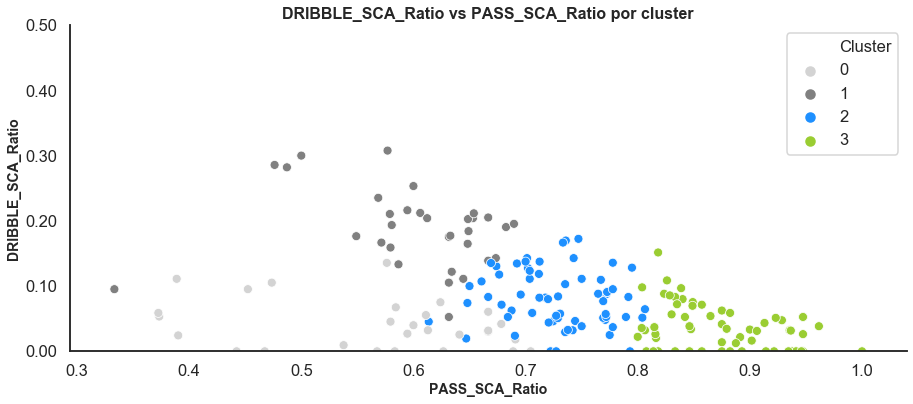

In [41]:
sns.set_context('talk')
#Seteamos cuestiones iniciales del gráfico
sns.set_style('white')
plt.figure(figsize = (15, 6))

#Creamos el gráfico
g = sns.scatterplot(x = 'PASS_SCA_Ratio', y = 'DRIBBLE_SCA_Ratio', hue = 'Cluster', 
            data = df_atk,
            #palette = ("Blues_d"), 
            palette = ['lightgrey', 'grey', 'dodgerblue','yellowgreen'], 
            ci = None)

g.set(ylim = (0,0.5))
ylabels = ['{:,.2f}'.format(y)  for y in g.get_yticks()]
g.set_yticklabels(ylabels)



#Despine las visualizaciones
sns.despine()

#Finalmente
plt.ylabel('DRIBBLE_SCA_Ratio', fontsize = 14, fontweight = 'semibold')
plt.xlabel('PASS_SCA_Ratio', fontsize = 14, fontweight = 'semibold')
plt.title('DRIBBLE_SCA_Ratio vs PASS_SCA_Ratio por cluster', fontsize = 16, fontweight = 'semibold')

plt.show()

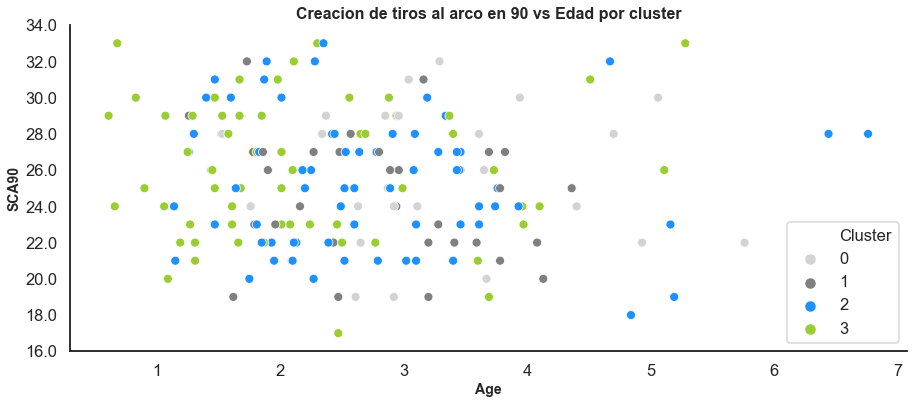

In [42]:
sns.set_context('talk')
#Seteamos cuestiones iniciales del gráfico
sns.set_style('white')
plt.figure(figsize = (15, 6))

#Creamos el gráfico
g = sns.scatterplot(x = 'SCA90', y = 'Age', hue = 'Cluster', 
            data = df_atk,
            #palette = ("Blues_d"), 
            palette = ['lightgrey', 'grey', 'dodgerblue','yellowgreen'], 
            ci = None)

g.set(ylim = (16,34))
ylabels = ['{:,.1f}'.format(y)  for y in g.get_yticks()]
g.set_yticklabels(ylabels)



#Despine las visualizaciones
sns.despine()

#Finalmente
plt.ylabel('SCA90', fontsize = 14, fontweight = 'semibold')
plt.xlabel('Age', fontsize = 14, fontweight = 'semibold')
plt.title('Creacion de tiros al arco en 90'' vs Edad por cluster', fontsize = 16, fontweight = 'semibold')

plt.show()

In [38]:
df_atk_18 = df_atk[df_atk['SCA90'] > 5.0 ]
df_atk_18

,Player,Nation,Pos,Squad,Age,Born,90s,SCA,SCA90,PASS_SCA,DEADBALL_SCA,DRIBBLE_SCA,SHOOT_SCA,FOULED_SCA,Sum_SCA,PASS_SCA_Ratio,DEADBALL_SCA_Ratio,DRIBBLE_SCA_Ratio,SHOOT_SCA_Ratio,FOULED_SCA_Ratio,Suma_De_ratios,Cluster
104,Kevin De Bruyne,BEL,MF,Manchester City,28,1991,29.0,196,6.76,142,34,9,4,7,196,0.724490,0.173469,0.045918,0.020408,0.035714,1.0,4
142,Phil Foden,ENG,FW,Manchester City,19,2000,7.5,39,5.19,30,2,3,1,3,39,0.769231,0.051282,0.076923,0.025641,0.076923,1.0,2
172,Jack Grealish,ENG,FW,Aston Villa,23,1995,32.9,170,5.16,120,22,10,1,17,170,0.705882,0.129412,0.058824,0.005882,0.100000,1.0,4
272,James Maddison,ENG,MF,Leicester City,22,1996,29.2,168,5.76,76,53,16,7,16,168,0.452381,0.315476,0.095238,0.041667,0.095238,1.0,3
274,Riyad Mahrez,ALG,FW,Manchester City,28,1991,20.6,133,6.44,89,13,18,3,10,133,0.669173,0.097744,0.135338,0.022556,0.075188,1.0,0
364,Paul Pogba,FRA,MF,Manchester Utd,26,1993,10.4,53,5.11,45,0,4,0,4,53,0.849057,0.000000,0.075472,0.000000,0.075472,1.0,1
421,David Silva,ESP,MF,Manchester City,33,1986,18.4,97,5.28,81,1,7,4,4,97,0.835052,0.010309,0.072165,0.041237,0.041237,1.0,2
495,Willian,BRA,FW,Chelsea,30,1988,28.2,143,5.06,97,31,6,3,6,143,0.678322,0.216783,0.041958,0.020979,0.041958,1.0,4
